# Credit Card Fraud Prediction

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase

### About the dataset
The dataset is taken from [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data). The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification

In [5]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#load dataset
df_ori = pd.read_csv("creditcard.csv")
df_ori.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df = df_ori.copy() # Make a copy of the DataFrame to avoid modifying the original

# 1. Data Analysis

In [8]:
df.shape

(284807, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
df.duplicated().sum()

1081

In [12]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
# check for unique value on each column
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

### Findings:

1. There are 1081 duplicated rows. Need to remove them.


# 2. Data Preprocessing

Remove Duplicated rows

In [14]:
df = df.drop_duplicates()

In [15]:
df.shape

(283726, 31)

# 3. Data Exploration

### 3.1 Distribution of Data

In [16]:
# Filter the DataFrame to include only rows where churn occurred (Churn == 1)
fraud_df = df[df['Class'] == 1]
not_fraud_df = df[df['Class'] == 0]

fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,...,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.0
mean,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860,1.0
std,48636.179973,6.593145,4.122500,6.909647,2.871523,5.278831,1.715347,6.858024,5.585950,2.465047,...,2.731191,1.181295,1.508570,0.517900,0.806785,0.463016,1.245779,0.533100,260.211041,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41203.000000,-5.603690,1.145381,-7.926507,2.288644,-4.278983,-2.450444,-6.989195,-0.161518,-3.796760,...,0.027935,-0.521934,-0.341881,-0.436539,-0.320311,-0.263078,-0.015551,-0.097223,1.000000,1.0
50%,73408.000000,-2.271755,2.617105,-4.875397,4.100098,-1.372245,-1.420468,-2.902079,0.617738,-2.099049,...,0.573898,0.055179,-0.075034,-0.061263,0.077913,0.012792,0.394682,0.145895,9.820000,1.0
75%,129095.000000,-0.361428,4.571743,-2.171454,6.290918,0.260821,-0.413647,-0.907188,1.709417,-0.788388,...,1.192694,0.616383,0.287659,0.282030,0.463827,0.395528,0.821048,0.372393,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [17]:
not_fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,...,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.0
mean,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.001150,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575,0.0
std,47475.550607,1.922179,1.633520,1.457593,1.398575,1.355816,1.329914,1.177480,1.157140,1.086902,...,0.715629,0.723541,0.621165,0.605748,0.520612,0.482080,0.392700,0.327563,250.379023,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54233.000000,-0.913431,-0.601398,-0.883966,-0.851605,-0.687888,-0.767543,-0.550146,-0.208841,-0.641649,...,-0.228406,-0.542737,-0.161490,-0.354306,-0.317476,-0.326853,-0.070650,-0.052808,5.670000,0.0
50%,84711.000000,0.022562,0.062561,0.182247,-0.024500,-0.052807,-0.274172,0.041664,0.021633,-0.051368,...,-0.029798,0.006675,-0.011077,0.041115,0.016190,-0.052293,0.001368,0.011238,22.000000,0.0
75%,139308.000000,1.316788,0.797012,1.028261,0.734231,0.612442,0.397678,0.571029,0.324473,0.596969,...,0.185470,0.528136,0.147633,0.440051,0.350490,0.240023,0.090760,0.077961,77.460000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [18]:
# count Class 1 (Fraud) value
df["Class"].sum()

473

#### 3.1.1 Fraud Distribution

In [19]:
fraud_count = df['Class'].value_counts()
print(fraud_count)

Class
0    283253
1       473
Name: count, dtype: int64


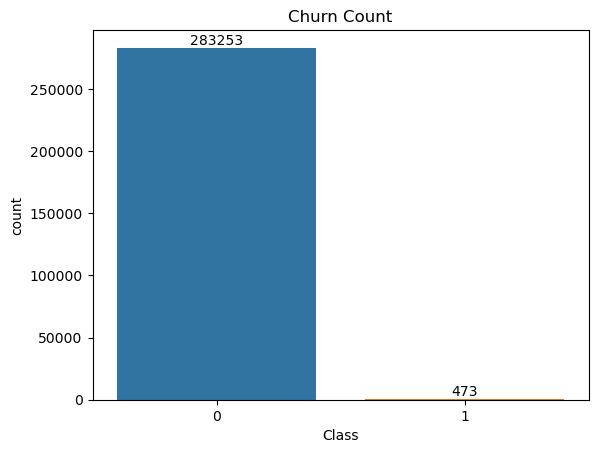

In [20]:
sns.countplot(x='Class', data= df)

# Annotate count values
for i, count in enumerate(df['Class'].value_counts()):
    plt.text(i, count, str(count), ha = 'center',va='bottom')

plt.title("Churn Count")
plt.show()

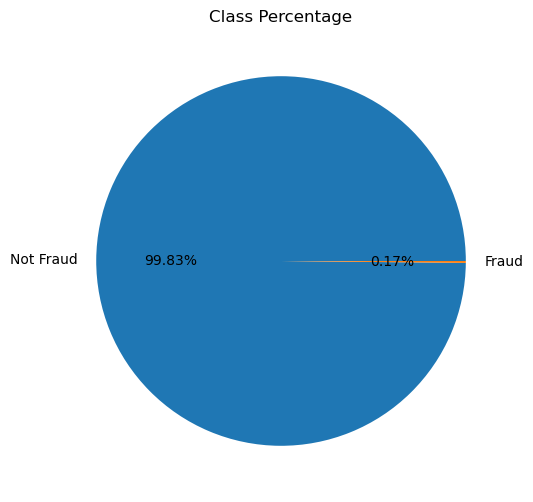

In [21]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['Class'].value_counts(), labels=['Not Fraud','Fraud'], autopct='%1.2f%%')
plt.title('Class Percentage')
plt.show()

# Findings:
* The dataset is highly unbalanced.
* 492 frauds out of 284,807 transactions.
* The dataset only contain 0.17% of fraud dataset.
* Can try to compare training with SMOTE dataset and Undersampling method.

#### 3.1.2 Time Distribution

In [22]:
time_count = df['Time'].value_counts()
print(time_count)

Time
3767.0      21
3770.0      20
19912.0     19
3750.0      19
73885.0     17
            ..
127732.0     1
62217.0      1
127739.0     1
127741.0     1
172792.0     1
Name: count, Length: 124592, dtype: int64


In [23]:
df['Time'].describe()

count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64

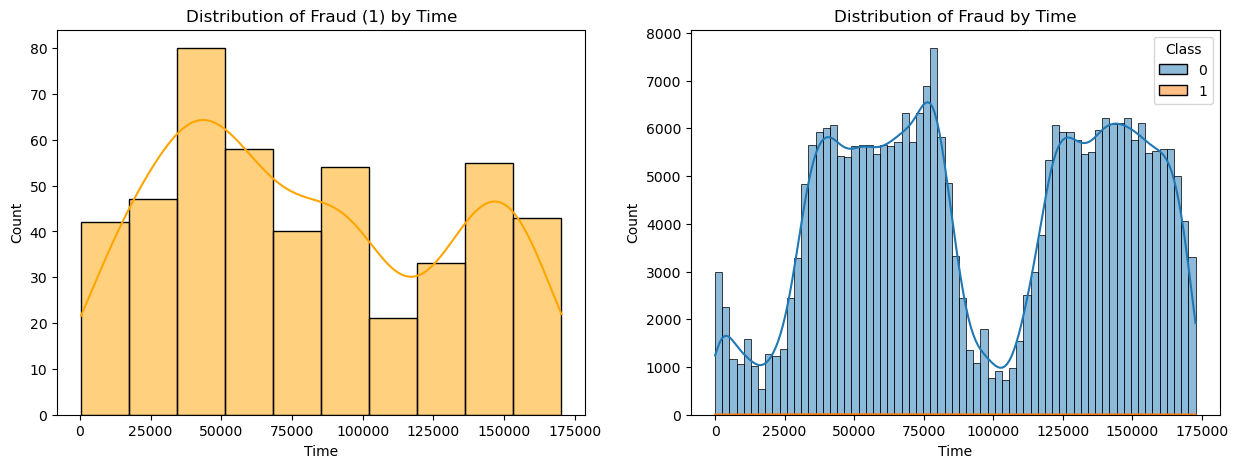

In [24]:
# histogram for age distribution
fig,ax = plt.subplots(1,2,figsize=(15,5))

# Plot with Bin to have a better visualization of the data. Without bin, there might be misunderstanding of the data.
sns.histplot(x = 'Time', data=fraud_df, multiple='stack', kde=True, ax=ax[0], color='orange')
ax[0].set_title('Distribution of Fraud (1) by Time')

sns.histplot(x = 'Time', data = df, hue='Class', multiple='stack', kde=True, ax=ax[1])
ax[1].set_title('Distribution of Fraud by Time')
plt.show()

#NOTE: Blue "0" is actually the total count of age and not represent "not Churn"

In [25]:
fraud_df['Time'].mean()

80450.51374207188

### Findings:

1. From the fraud distribution with transaction time. It is hard to identify if specific time contribute to credit card fraud cases.
2. However, average transaction time for credit card fraud cases is 80450.5137
3. The standard deviation (std) of the Time distribution is quite high.

#### 3.1.3 Amount Distribution

In [26]:
amount_count = df['Amount'].value_counts()
print(amount_count)

Amount
1.00      13566
1.98       6044
0.89       4871
9.99       4738
15.00      3280
          ...  
526.60        1
248.16        1
492.65        1
811.50        1
95.63         1
Name: count, Length: 32767, dtype: int64


In [27]:
df['Amount'].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

From here we can see, the min value is 0, mean 88.47, but the max is 25691.16. There are outliers or anomaly in this features distribution

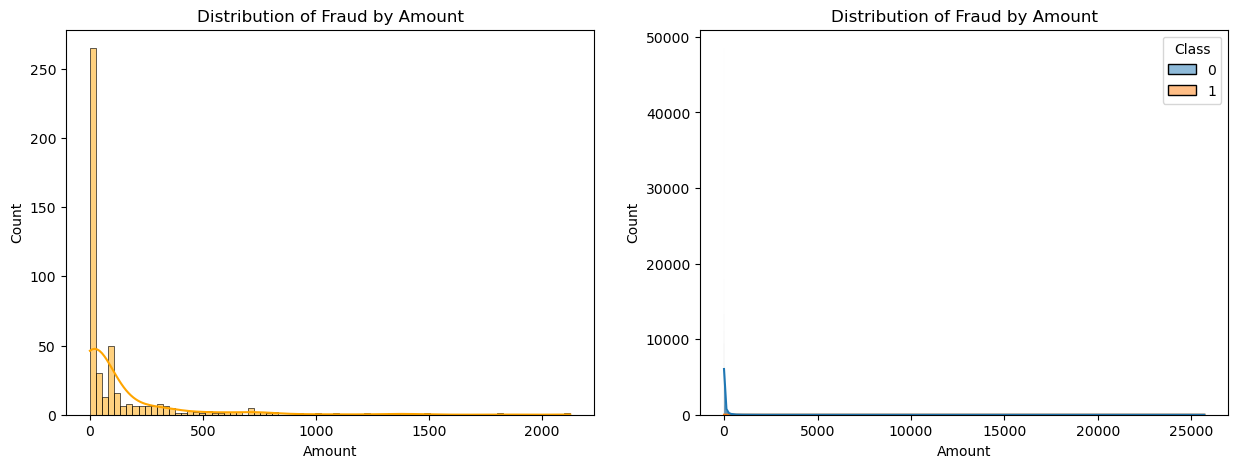

In [28]:
# histogram for age distribution
fig,ax = plt.subplots(1,2,figsize=(15,5))

# Plot with Bin to have a better visualization of the data. Without bin, there might be misunderstanding of the data.
sns.histplot(x = 'Amount', data=fraud_df, multiple='stack', kde=True, ax=ax[0], color='orange')
ax[0].set_title('Distribution of Fraud by Amount')

sns.histplot(x = 'Amount', data = df, hue='Class', multiple='stack', kde=True, ax=ax[1])
ax[1].set_title('Distribution of Fraud by Amount')
plt.show()

#NOTE: Blue "0" is actually the total count of age and not represent "not Churn"

### Check for Outliers

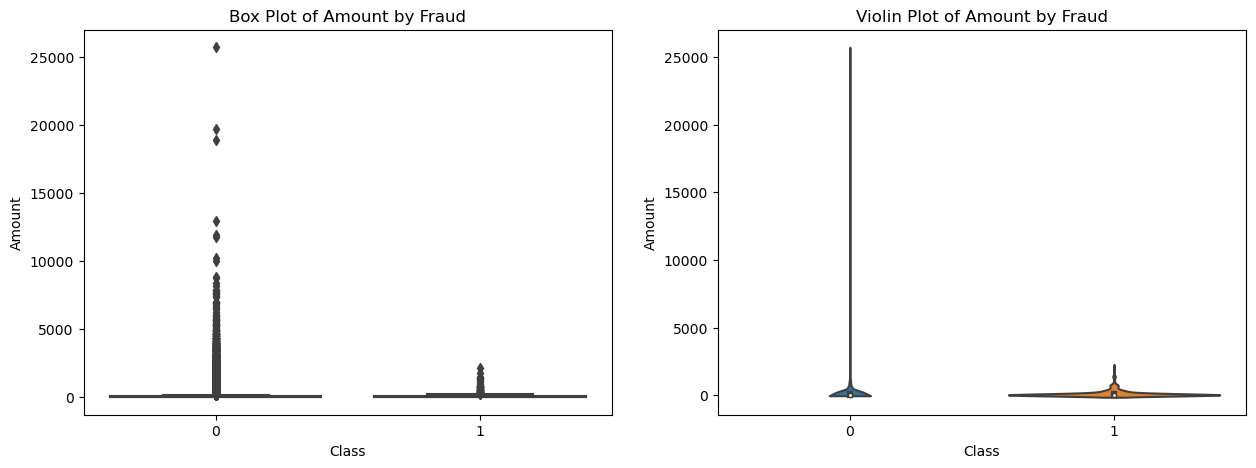

In [29]:
# Check for outliers
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x ='Class' , y = 'Amount', data=df ,ax=ax[0])
ax[0].set_title('Box Plot of Amount by Fraud')

sns.violinplot(x ='Class' , y = 'Amount', data=df ,ax=ax[1])
ax[1].set_title('Violin Plot of Amount by Fraud')
plt.show()

In [30]:
# set limit here
range = 200

# Try to see how any rows with amount above 100
amount_above_range = df[df['Amount'] > range]

# Count the number of rows where the 'Amount' column is above 100
count_above_range = amount_above_range.shape[0]

print(f"Number of rows with amount above {range}:, {count_above_range}")

Number of rows with amount above 200:, 28770


### Findings:

* From here we can see, the min value is 0, mean 88.47, but the max is 25691.16. There are outliers or anomaly in this features distribution.
* Amount 0 contribute to higher credit card cases.
* If we use IQR to remove outliers, we will remove more than 28k data. We don't want to remove too many dataset since it might be the real world case scenario and not anomalies.
* Try a different approach to handle this case:
    - apply logarithmic transformation
    - check for outliers
    - apply IQR on log data to remove outliers
    - This might reduce the number of removed dataset

# 4. Data Pre-Processing-2

#### 4.1 Logarithmic transformation
Instead of removing outliers, try to transform the data logarithmically.
* In this case, the outliers might be a real data. When using remove outliers with IQR method, large amount of dataset has been remove (more than 30k rows). It is not good to remove such large amount of dataset. Hence we will use Logarithmic transformation to handle the outliers.

In [31]:
# Logarithmic transformation using natural logarithm (base e)
df['Amount_log'] = np.log1p(df['Amount'])  # np.log1p() computes log(1 + x) to avoid undefined values for zero or negative values

# Remove the original 'Amount' column
df.drop(columns=['Amount'], inplace=True)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539


In [32]:
df['Amount_log'].describe()

count    283726.000000
mean          3.153760
std           1.657080
min           0.000000
25%           1.887070
50%           3.135494
75%           4.363226
max          10.153941
Name: Amount_log, dtype: float64

In [33]:
fraud_log_amount_df = df[df['Class'] == 1]

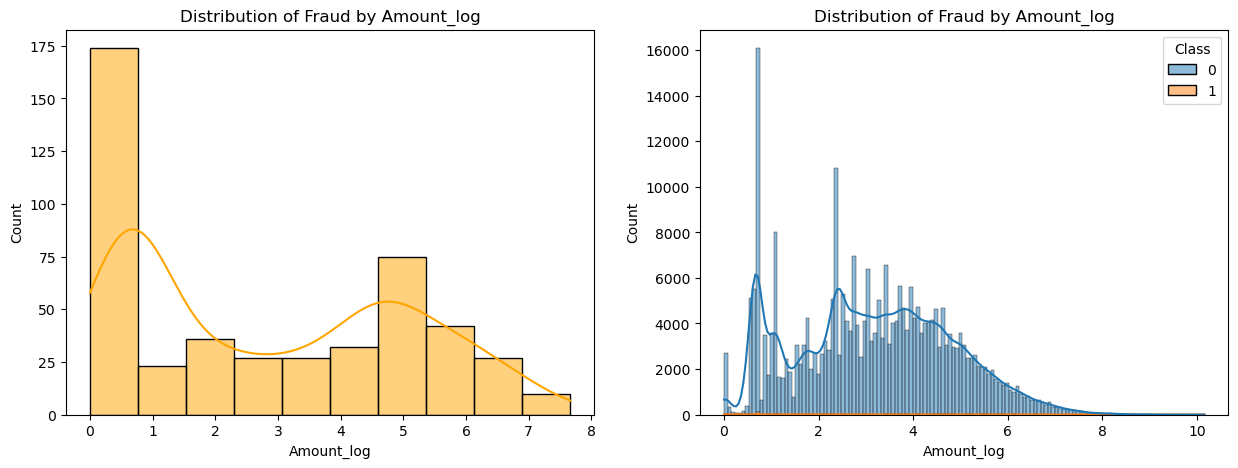

In [34]:
# histogram for age distribution
fig,ax = plt.subplots(1,2,figsize=(15,5))

# Plot with Bin to have a better visualization of the data. Without bin, there might be misunderstanding of the data.
sns.histplot(x = 'Amount_log', data=fraud_log_amount_df, multiple='stack', kde=True, ax=ax[0], color='orange')
ax[0].set_title('Distribution of Fraud by Amount_log')

sns.histplot(x = 'Amount_log', data = df, hue='Class', multiple='stack', kde=True, ax=ax[1])
ax[1].set_title('Distribution of Fraud by Amount_log')
plt.show()

#NOTE: Blue "0" is actually the total count of age and not represent "not Churn"

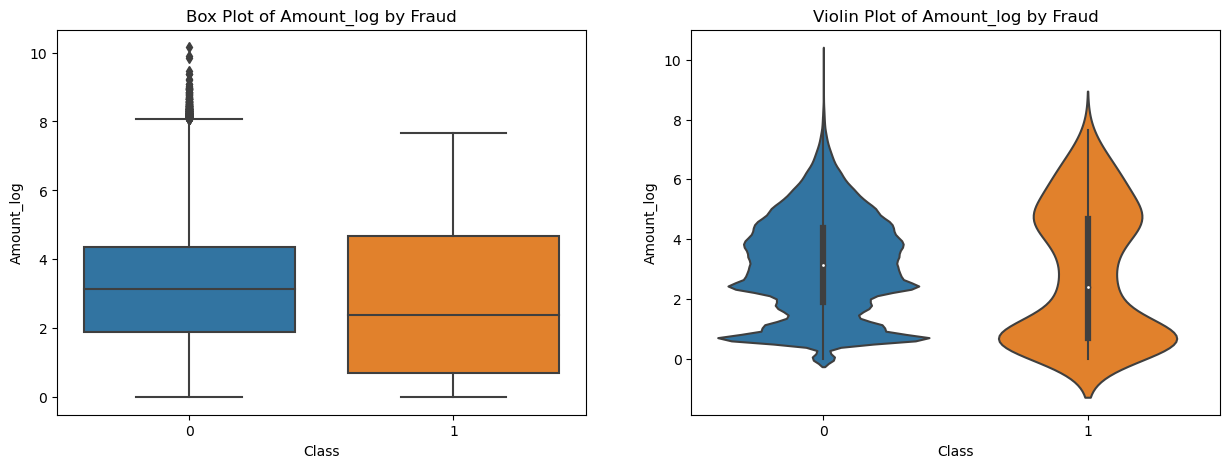

In [35]:
# Check for outliers
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x ='Class' , y = 'Amount_log', data=df ,ax=ax[0])
ax[0].set_title('Box Plot of Amount_log by Fraud')

sns.violinplot(x ='Class' , y = 'Amount_log', data=df ,ax=ax[1])
ax[1].set_title('Violin Plot of Amount_log by Fraud')
plt.show()

### Findings:

* After implementing logarithmic transformation on Amount features, we can see the data is not has lesser outliers.
* We are not removing the dataset since it might be a real world scenario data.

#### 4.2 Remove Outliers
Removing outlier from claims values column using IQR method. Can also use z-score method

### 4.1.1 IQR Method

In [36]:
df.shape

(283726, 31)

In [37]:
Q1 = df['Amount_log'].quantile(0.25)
Q3 = df['Amount_log'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df = df[(df['Amount_log'] >= lower_bound) & (df['Amount_log'] <= upper_bound)]

In [38]:
df.shape

(283490, 31)

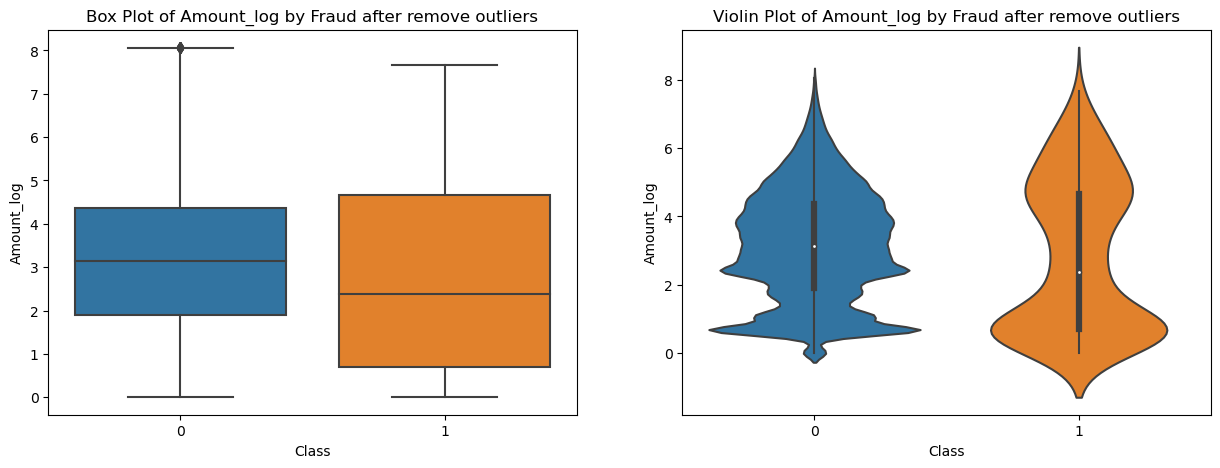

In [39]:
# Check for outliers
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x ='Class' , y = 'Amount_log', data=df ,ax=ax[0])
ax[0].set_title('Box Plot of Amount_log by Fraud after remove outliers')

sns.violinplot(x ='Class' , y = 'Amount_log', data=df ,ax=ax[1])
ax[1].set_title('Violin Plot of Amount_log by Fraud after remove outliers')
plt.show()

### Findings:

* Comparison on handling outliers approach:

METHOD A: REMOVE OUTLIERS DIRECTLY FROM ORIGINAL "AMOUNT" DATA
* We will remove more than 28k rows of data.

METHOD B: REMOVE OUTLIERS DIRECTLY FROM ORIGINAL "AMOUNT_LOG" DATA
* We will remove only about 300 rows of data.

#### 4.3 Normalization
For Time column, we can use normalization to scale the data

In [40]:
from sklearn.preprocessing import MinMaxScaler

def normalization_continuous_variables(df, columns):
    """
    Normalizes continuous variables in a DataFrame using StandardScaler.

    Parameters:
    - df: pandas DataFrame
        Input DataFrame containing the columns to be normalized.
    - columns: list of strings
        List of column names to be normalized.

    Returns:
    - df: pandas DataFrame
        DataFrame with specified columns normalized.
    """
    df = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
    minmax_scaler = MinMaxScaler()
    df[columns] = minmax_scaler.fit_transform(df[columns])
    return df

# Specify columns to be normalized
columns_to_normalize = ['Time']

# Normalize continuous variables
df = normalization_continuous_variables(df, columns_to_normalize)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_log
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539


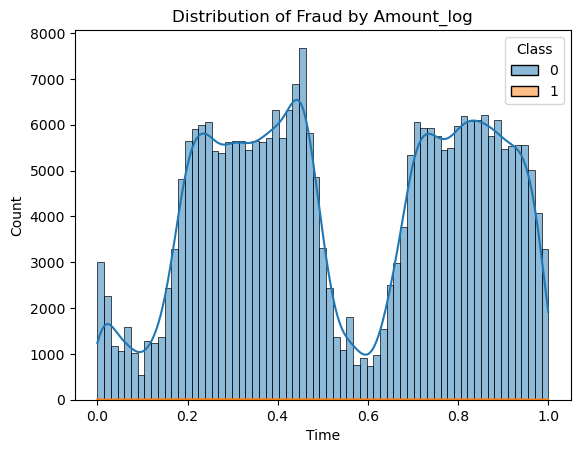

In [41]:
sns.histplot(x = 'Time', data = df, hue='Class', multiple='stack', kde=True).set_title('Distribution of Fraud by Amount_log')
plt.show()

## Coorelation Matrix Heatmap

Look for patterns of high correlation (either positive or negative) between variables.
* Variables with high positive correlation may provide redundant information. In such cases, you may consider removing one of the variables to reduce multicollinearity.
* Variables with high negative correlation may also indicate redundancy, but they could also provide contrasting information. Be cautious about removing variables solely based on negative correlation.

In [42]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_log
Time,1.000000,0.119637,-0.011006,-0.426613,-0.106251,0.181776,-0.064732,0.091099,-0.038292,-0.007888,...,0.046722,0.144215,0.055785,-0.015831,-0.235089,-0.041869,-0.005436,-0.009832,-0.012366,-0.028351
V1,0.119637,1.000000,-0.039781,-0.031256,0.015961,-0.043082,0.020839,0.037932,-0.011751,0.000778,...,0.008382,-0.010481,-0.014434,0.000634,-0.005043,-0.002500,-0.006452,-0.004979,-0.095941,-0.086967
V2,-0.011006,-0.039781,1.000000,-0.032649,0.023734,-0.044862,0.026089,0.080337,-0.010693,-0.003570,...,0.016447,-0.019069,-0.027226,0.002134,-0.013854,-0.005187,0.008865,0.008710,0.088068,-0.450097
V3,-0.426613,-0.031256,-0.032649,1.000000,0.014191,-0.049073,0.023361,0.040644,-0.013775,-0.005539,...,0.005412,-0.006854,-0.013527,0.001955,-0.003716,-0.000803,0.008657,-0.003827,-0.184579,-0.023229
V4,-0.106251,0.015961,0.023734,0.014191,1.000000,0.018408,-0.010187,-0.017835,0.005542,0.003135,...,-0.006137,0.005565,0.008298,-0.000851,0.003630,0.002032,-0.001183,-0.000657,0.129947,-0.010022
V5,0.181776,-0.043082,-0.044862,-0.049073,0.018408,1.000000,0.061591,0.110989,-0.025078,-0.006137,...,-0.007536,-0.005306,-0.007165,0.004741,-0.000468,0.002083,0.042948,-0.021454,-0.092375,-0.282002
V6,-0.064732,0.020839,0.026089,0.023361,-0.010187,0.061591,1.000000,-0.075090,0.019825,0.002269,...,0.006179,0.002104,-0.000847,-0.001101,-0.000822,-0.001611,-0.031948,0.014183,-0.044657,0.156904
V7,0.091099,0.037932,0.080337,0.040644,-0.017835,0.110989,-0.075090,1.000000,0.023663,0.001638,...,0.016411,0.003668,-0.003464,-0.004472,-0.002796,-0.001008,-0.057276,0.022685,-0.184654,0.076884
V8,-0.038292,-0.011751,-0.010693,-0.013775,0.005542,-0.025078,0.019825,0.023663,1.000000,0.000516,...,0.014669,-0.008190,-0.009836,0.002197,-0.002729,-0.001056,0.017428,-0.004926,0.033167,-0.016803
V9,-0.007888,0.000778,-0.003570,-0.005539,0.003135,-0.006137,0.002269,0.001638,0.000516,1.000000,...,0.003242,0.000692,0.009619,-0.000497,0.001177,0.001147,0.007282,0.004345,-0.094144,-0.080155


In [43]:
# using correlation statistical method to find the relation between the churn and other features
df.corr()['Class'].sort_values(ascending=False)

Class         1.000000
V11           0.149188
V4            0.129947
V2            0.088068
V19           0.033656
V8            0.033167
V21           0.026691
V20           0.023838
V27           0.022554
V28           0.009885
V22           0.004842
V26           0.004253
V25           0.003180
V15          -0.003280
V13          -0.003883
V23          -0.007035
V24          -0.007210
Amount_log   -0.007723
Time         -0.012366
V6           -0.044657
V5           -0.092375
V9           -0.094144
V1           -0.095941
V18          -0.105470
V3           -0.184579
V7           -0.184654
V16          -0.187636
V10          -0.207754
V12          -0.250941
V14          -0.293690
V17          -0.313682
Name: Class, dtype: float64

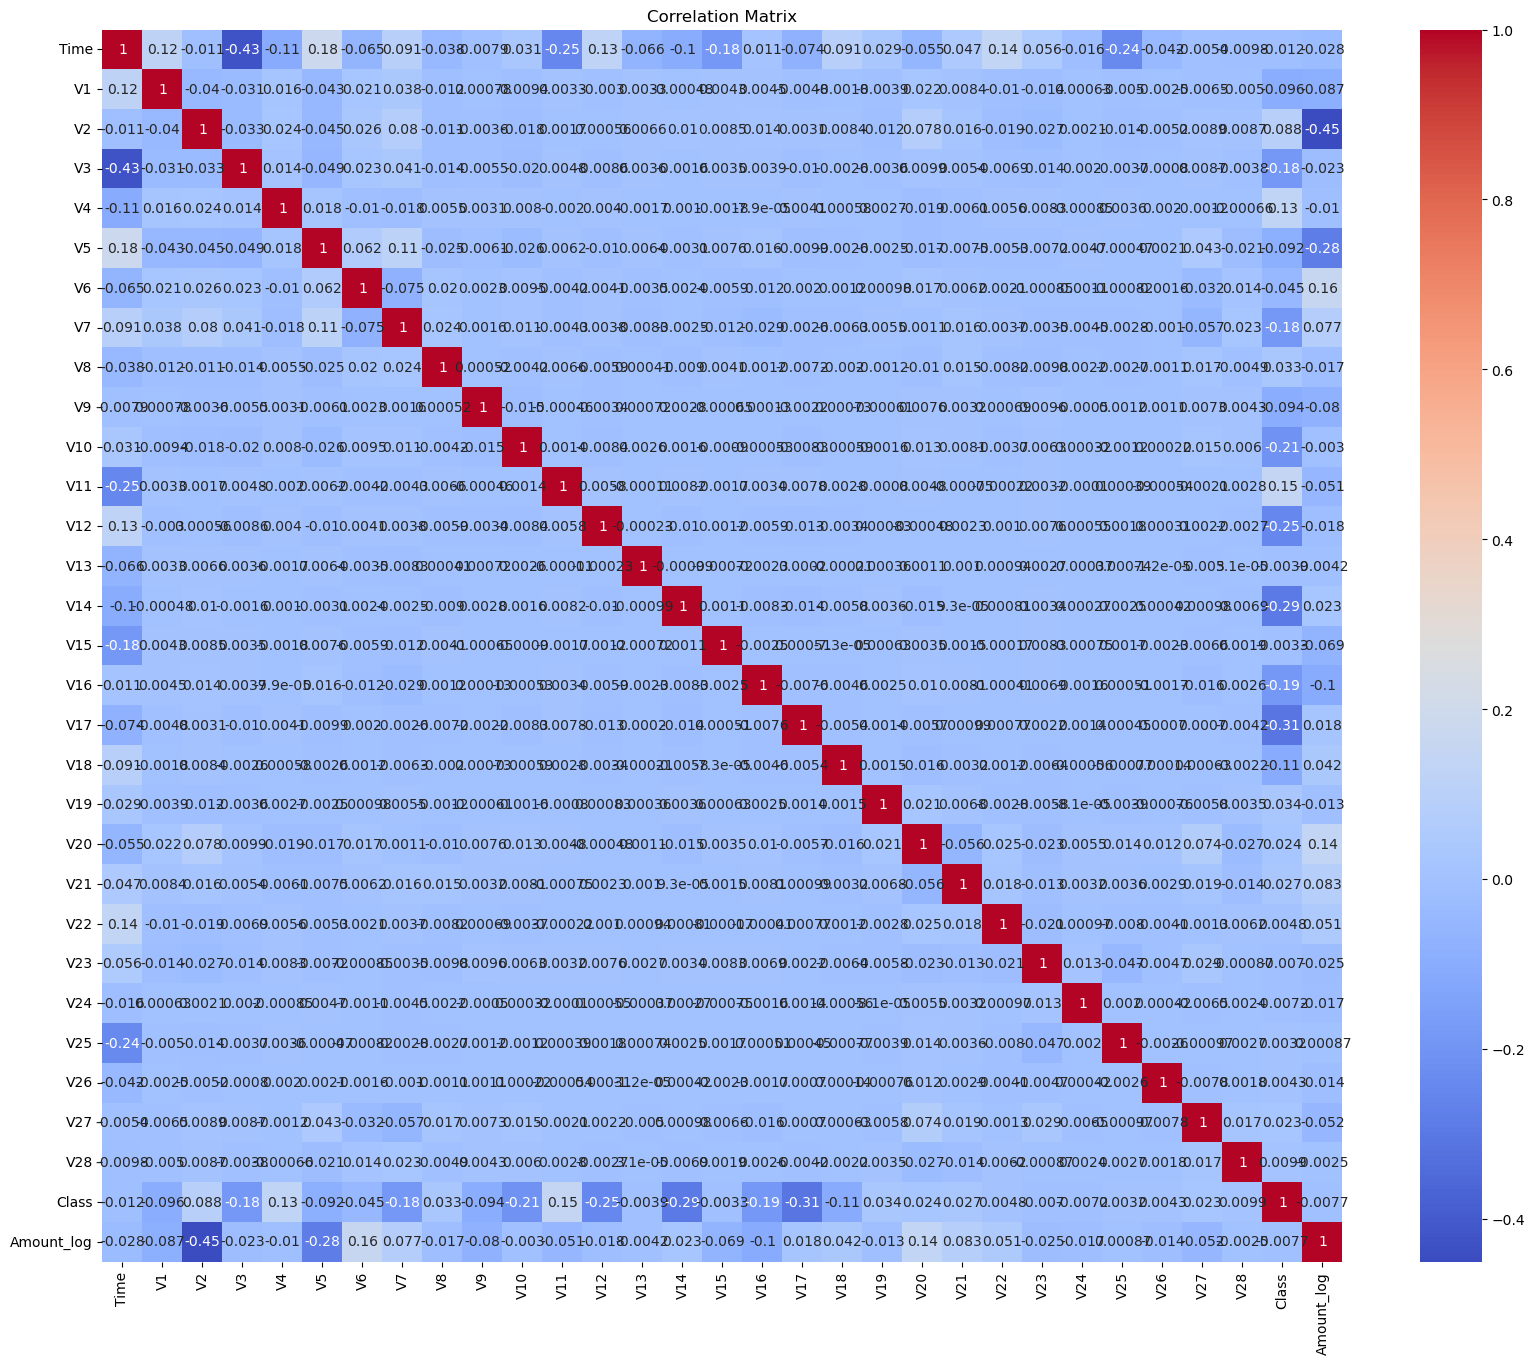

In [44]:
#Correlation Matrix Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: >

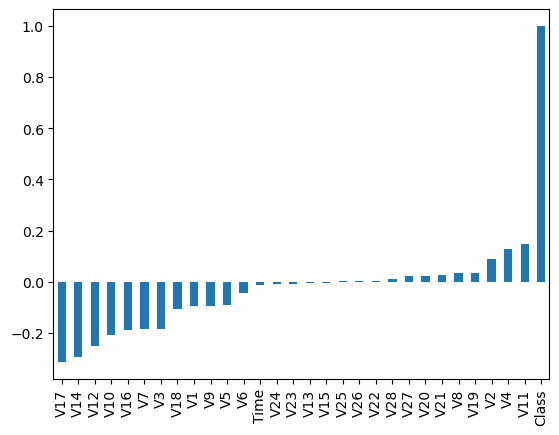

In [45]:
df.corr()['Class'][:-1].sort_values().plot(kind='bar')

### Findings:

* Data are well correlated. No features need to be removed.

# Handling Imbalance Dataset:
Using conventional predictive models such as Decision Trees, Logistic Regression, etc. could not be effective when dealing with an imbalanced dataset, because they might be biased toward predicting the class with the highest number of observations, and considering those with fewer numbers as noise. 

The most commonly used approaches include sampling techniques or harnessing the power of cost-sensitive algorithms. 

## Sampling Techniques 
These techniques aim to balance the distribution of the original by: 

* Cluster-based Oversampling:
* Random undersampling: random elimination of examples from the majority class. 
* SMOTE Oversampling: random replication of examples from the minority class. 

## Cost-Sensitive Algorithms 
These algorithms take into consideration the cost of misclassification. They aim to minimize the total cost generated by the models.

* Cost-sensitive Decision Trees.
* Cost-sensitive Logistic Regression. 
* Cost-sensitive Support Vector Machines.

### METHOD 1: SMOTE OVERSAMPLING

* In this case, the oversampling would be quite dramatic, to oversample data of 473 to 283k data.
* For the purpose of experimentation, I will proceed with this approach

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
# Create a df copy for smote
df_smote = df.copy()

In [48]:
# Separate features and target variable
X = df_smote.drop('Class', axis=1)  # Assuming 'target_column_name' is the name of your target column
y = df_smote['Class']

In [49]:
# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
# smote = SMOTE(sampling_strategy='minority')

# Apply SMOTE to the data
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X, y)

# If you want to convert back to DataFrame after resampling
# resampled_df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
# resampled_df['target'] = y_resampled

In [50]:
# Check if the data is balance
y_train_SMOTE.value_counts()

Class
0    283017
1    283017
Name: count, dtype: int64

In [51]:
df_smote.duplicated().sum()

0

In [52]:
X_train_SMOTE

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566029,0.245135,-0.992143,-1.641311,0.030979,1.095883,-2.215435,0.812593,2.516741,-0.237941,0.723719,...,1.673133,0.480017,0.596383,1.542844,0.157050,0.114368,-0.036872,-0.314082,-0.167129,6.575969
566030,0.404453,-1.564599,1.114319,-1.592220,2.758469,-2.601723,-0.302867,-1.519130,0.806926,-1.438025,...,1.192768,0.712682,0.490553,0.550581,0.289000,0.031841,0.840617,0.348271,0.290467,5.717968
566031,0.264306,-1.437566,2.125365,-1.417954,1.477885,-0.562584,-1.249827,-1.740141,-0.121039,-1.418895,...,0.260311,1.012138,0.033108,-0.185198,0.020597,0.026470,-0.483123,0.455209,0.037110,0.693147
566032,0.080185,-4.005586,8.042555,-14.741078,10.233903,-3.826823,-3.221248,-10.226260,4.432480,-5.725178,...,1.418526,1.952959,0.217609,0.402233,-1.196330,-0.364535,0.638941,1.663023,0.751281,0.693147


## Train/Test Split

In [53]:
# Split SMOTE dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_SMOTE, y_train_SMOTE, test_size=0.3, random_state=42)

In [54]:
X_train.shape, X_test.shape

((396223, 30), (169811, 30))

In [55]:
y_train.shape, y_test.shape

((396223,), (169811,))

## Model Building

Since this is a binary-classification problem, we can try build a ML model using the following architecture:

1. Logistic Regression
2. Support Vector Machine
3. KNN
4. Naive Bayes
5. Decision Tree Classifier - Can handle Categorical & Numerical
6. Random Forest Classifier - Can handle Categorical & Numerical
7. XGBoost Classifier

### 1. Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000, random_state=42, verbose=True)
lr

LogisticRegression(max_iter=1000, random_state=42, verbose=True)

In [57]:
# training the model (imbalance)
lr.fit(X_train, y_train)

# Calculating training accuracy
train_accuracy = lr.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
lr_pred = lr.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, lr_pred))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74641D+05    |proj g|=  6.83457D+05


 This problem is unconstrained.



At iterate   50    f=  5.38793D+04    |proj g|=  1.24403D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   31     70     79      1     0     0   2.439D+00   5.388D+04
  F =   53879.147429870747     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Training Accuracy: 0.9450082403091189
Test Accuracy: 0.9451920075849032


### 2. Support Vector Machine (SVM)

In [58]:
# from sklearn.svm import SVC
# svm = SVC(verbose=True)
# svm

In [59]:
# svm.fit(X_train, y_train)

# # Calculating training accuracy
# train_accuracy = svm.score(X_train, y_train)
# print("Training Accuracy:", train_accuracy)

# # Calculate test accuracy
# svm_pred = svm.predict(X_test)
# print("Test Accuracy:", accuracy_score(y_test, svm_pred))

SVM took more than 61mins to train.

### 3. K-Nearest Neighbors (KNN)

In [60]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# knn

In [61]:
# knn.fit(X_train, y_train)

# # Calculating training accuracy
# train_accuracy = knn.score(X_train, y_train)
# print("Training Accuracy:", train_accuracy)

# # Calculate test accuracy
# knn_pred = knn.predict(X_test)
# print("Test Accuracy:", accuracy_score(y_test, knn_pred))

Error when trying to train with KNN

### 4. Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier

GaussianNB()

In [63]:
nb_classifier.fit(X_train, y_train)

# Calculating training accuracy
train_accuracy = nb_classifier.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
nb_pred = nb_classifier.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, nb_pred))

Training Accuracy: 0.9110879479485038
Test Accuracy: 0.9107596092125951


### 5. Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [65]:
# #creating Decision Tree Classifer object
# dtree = DecisionTreeClassifier()

# #defining parameter range
# param_grid = {
#     'max_depth': [2,4,6,8,10,12,14,16,18,20],
#     'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
#     'criterion': ['gini', 'entropy'],
#     'random_state': [0,42]
#     }

# #Creating grid search object
# grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 2)

# #Fitting the grid search object to the training data
# grid_dtree.fit(X_train, y_train)

# #Printing the best parameters
# print('Best parameters found: ', grid_dtree.best_params_)

* Best parameters found for IMBALANCE: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 8, 'random_state': 0}

In [66]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0, min_samples_leaf=8)
dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=0)

In [67]:
#training the model
dtree.fit(X_train, y_train)

# Calculating training accuracy
train_accuracy = dtree.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
dtree_pred = dtree.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, dtree_pred))

Training Accuracy: 0.9648657447952289
Test Accuracy: 0.9637891538239572


### 6. Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
# from sklearn.ensemble import RandomForestClassifier
# #creating Random Forest Classifer object
# rfc = RandomForestClassifier()

# #defining parameter range
# param_grid = {
#     'max_depth': [2,4,6,8,10],
#     'min_samples_leaf': [2,4,6,8,10],
#     'criterion': ['gini', 'entropy'],
#     'random_state': [0,42]
#     }

# #Creating grid search object
# grid_rfc = GridSearchCV(rfc, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 2)

# #Fitting the grid search object to the training data
# grid_rfc.fit(X_train, y_train)

# #Printing the best parameters
# print('Best parameters found: ', grid_rfc.best_params_)

* Best parameters found without SMOTE:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 8, 'random_state': 0}

In [70]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8, random_state=0)
rfc

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8,
                       random_state=0)

In [71]:
#training the model
rfc.fit(X_train, y_train)

# Calculating training accuracy
train_accuracy = rfc.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate test accuracy
rfc_pred = rfc.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, rfc_pred))

Training Accuracy: 0.9739919186922515
Test Accuracy: 0.972699059542668


2 mins to train with Random Forest

### 7. XGBoost

In [72]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score

In [73]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, accuracy_score

# xgb = XGBClassifier()
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'objective': ['binary:logistic'],
#     'eval_metric': ['logloss'],
# }

# # Perform a grid search with cross-validation to find the best hyperparameters
# grid_search = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid,
#     scoring=make_scorer(accuracy_score),
#     cv=5,  # Number of cross-validation folds
#     verbose=2,  # Increase verbosity to see progress
# )

# # grid_search.fit(X_train, y_train)
# grid_search.fit(X_train_smote, y_train_smote)

# # Print the best hyperparameters
# print('Best parameters found: ', grid_search.best_params_)

* Best parameters found without SMOTE:  {'colsample_bytree': 1.0, 'eval_metric': 'logloss', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 0.8}

In [74]:
xgb = XGBClassifier(
    learning_rate=0.1,
    n_estimators=200,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=1.0,
    objective='binary:logistic',
    eval_metric = 'logloss',
    random_state=42
)

In [75]:
#Fitting the Xgboost to the training data
xgb.fit(X_train, y_train)

# Calculating training accuracy
train_accuracy = xgb.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

#test accuracy
xgb_pred = xgb.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, xgb_pred))

Training Accuracy: 0.9940513296805082
Test Accuracy: 0.9938755439871386


1min 35sec to train with XGboost

### 7. CatBoost

In [76]:
from catboost import CatBoostClassifier

In [77]:
# Initialize CatBoost classifier
catboost = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss')

In [78]:
#Fitting the Xgboost to the training data
catboost.fit(X_train, y_train)

# Calculating training accuracy
train_accuracy = catboost.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

#test accuracy
catboost_pred = catboost.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, catboost_pred))

0:	learn: 0.4750815	total: 96.9ms	remaining: 9.59s
1:	learn: 0.3629419	total: 129ms	remaining: 6.33s
2:	learn: 0.3003591	total: 155ms	remaining: 5.03s
3:	learn: 0.2531786	total: 180ms	remaining: 4.32s
4:	learn: 0.2159716	total: 204ms	remaining: 3.88s
5:	learn: 0.1864971	total: 229ms	remaining: 3.58s
6:	learn: 0.1656507	total: 251ms	remaining: 3.33s
7:	learn: 0.1544073	total: 275ms	remaining: 3.16s
8:	learn: 0.1420670	total: 301ms	remaining: 3.04s
9:	learn: 0.1316368	total: 329ms	remaining: 2.96s
10:	learn: 0.1232202	total: 355ms	remaining: 2.87s
11:	learn: 0.1168655	total: 379ms	remaining: 2.78s
12:	learn: 0.1104323	total: 406ms	remaining: 2.72s
13:	learn: 0.1074493	total: 430ms	remaining: 2.64s
14:	learn: 0.1043917	total: 453ms	remaining: 2.57s
15:	learn: 0.1012574	total: 476ms	remaining: 2.5s
16:	learn: 0.0966304	total: 500ms	remaining: 2.44s
17:	learn: 0.0938384	total: 525ms	remaining: 2.39s
18:	learn: 0.0906446	total: 552ms	remaining: 2.35s
19:	learn: 0.0883190	total: 576ms	remaini

### FINDINGS:
1. We try to train the model for dataset with and without SMOTE, to find if the model perform well with the additional synstetic data.
2. Discovered that XGBoost and Random Forest Classifier perform well with SMOTE dataset.
3. However, XGBoost give the highest model train and test accuracy about 99%.

# Model Evaluation

### GENERAL EVALUATION METRIC CHOICE
A. CHOOSE ACCURACY
* The dataset is balance
* The cost of FP and FN are roughly equal
* The benefit of TP and TN are roughly equal

B. CHOOSE PRECISION
* The cost of FP is much higher than a FN
* The benefit of TP is much higher than a TN

C. CHOOSE RECALL
* The cost of FN is much higher than a FP
* The benefit of TN is much higher than a TP

D. CHOOSE ROC AUC & PRECISION - RECALL CURVES
* Use ROC when dealing with balance dataset
* Use precision-recall when dealing with imbalance dataset

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Confusion Matrix

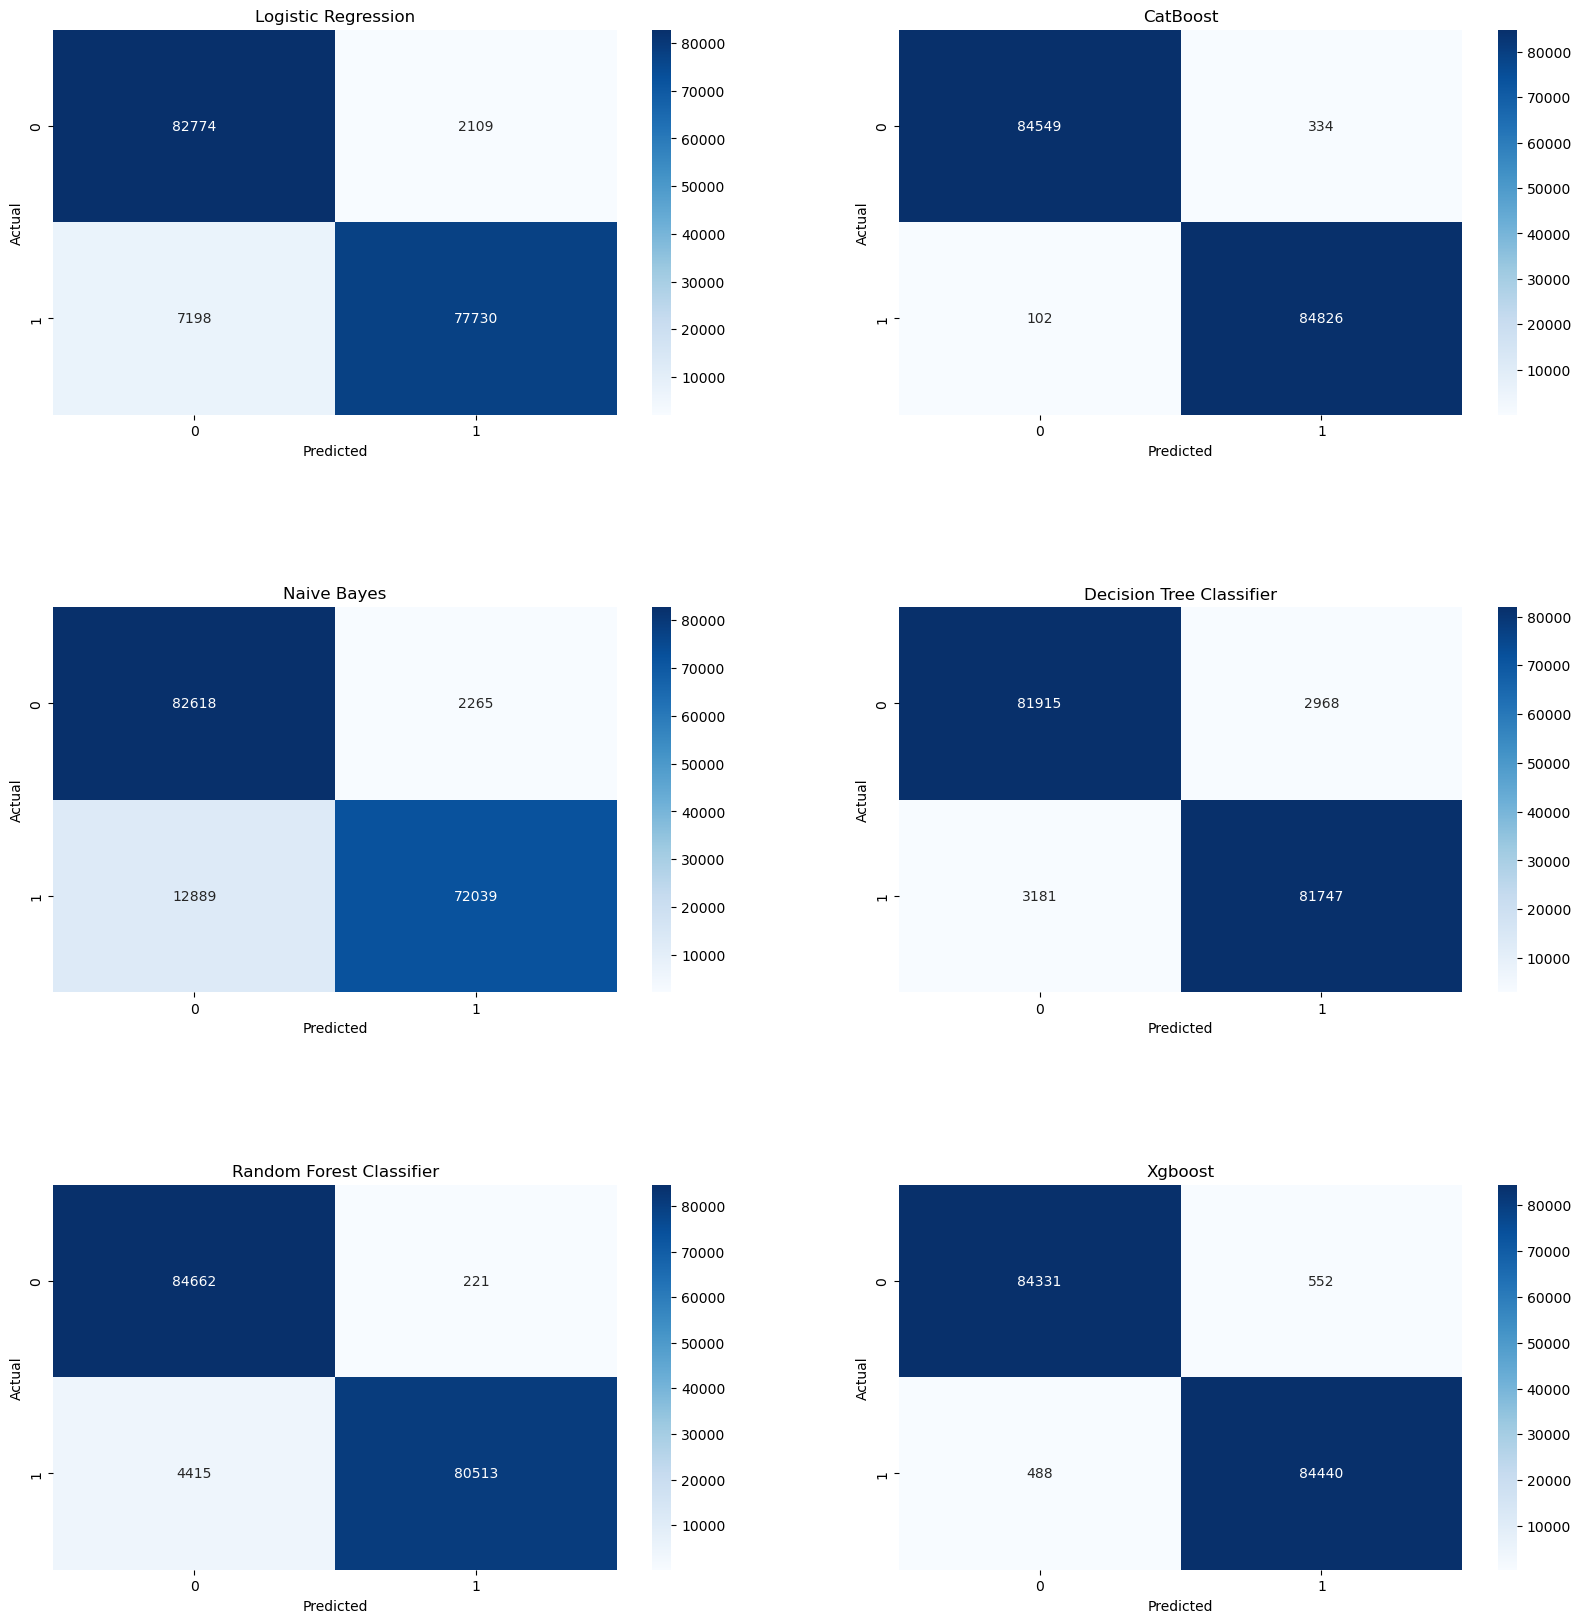

In [81]:
fig, ax = plt.subplots(3,2,figsize=(20,20))
fig.subplots_adjust(hspace=0.5)

sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='Blues', fmt='g', ax=ax[0,0]).set(title='Logistic Regression')
sns.heatmap(confusion_matrix(y_test, catboost_pred), annot=True, cmap='Blues', fmt='g', ax=ax[0,1]).set(title='CatBoost')
sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, cmap='Blues', fmt='g', ax=ax[1,0]).set(title='Naive Bayes')
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, cmap='Blues', fmt='g', ax=ax[1,1]).set(title='Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues', fmt='g', ax=ax[2,0]).set(title='Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, cmap='Blues', fmt='g', ax=ax[2,1]).set(title='Xgboost')

# Set X-axis and Y-axis labels
ax[0, 0].set_xlabel('Predicted')
ax[0, 0].set_ylabel('Actual')

ax[0, 1].set_xlabel('Predicted')
ax[0, 1].set_ylabel('Actual')

ax[1, 0].set_xlabel('Predicted')
ax[1, 0].set_ylabel('Actual')

ax[1, 1].set_xlabel('Predicted')
ax[1, 1].set_ylabel('Actual')

ax[2, 0].set_xlabel('Predicted')
ax[2, 0].set_ylabel('Actual')

ax[2, 1].set_xlabel('Predicted')
ax[2, 1].set_ylabel('Actual')

plt.show()

## Classification Report

In [83]:
print("lr_smote",classification_report(y_test,lr_pred))
print("catboost_smote", classification_report(y_test,catboost_pred))
print("knn_smote", classification_report(y_test,nb_pred))
print("dtree_smote", classification_report(y_test,dtree_pred))
print("rfc_smote", classification_report(y_test,rfc_pred))
print("xgb_smote", classification_report(y_test,xgb_pred))

lr_smote               precision    recall  f1-score   support

           0       0.92      0.98      0.95     84883
           1       0.97      0.92      0.94     84928

    accuracy                           0.95    169811
   macro avg       0.95      0.95      0.95    169811
weighted avg       0.95      0.95      0.95    169811

catboost_smote               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84883
           1       1.00      1.00      1.00     84928

    accuracy                           1.00    169811
   macro avg       1.00      1.00      1.00    169811
weighted avg       1.00      1.00      1.00    169811

knn_smote               precision    recall  f1-score   support

           0       0.87      0.97      0.92     84883
           1       0.97      0.85      0.90     84928

    accuracy                           0.91    169811
   macro avg       0.92      0.91      0.91    169811
weighted avg       0.92      0.91      0

### Accuracy, Recall, Precision, F1-Score

In [89]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, r2_score, mean_squared_error
from sklearn.metrics import precision_recall_curve

classifiers = [lr, catboost, nb_classifier, dtree, rfc, xgb]
classifier_names = ['Logistic Regression', 'Catboost', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost']
y_preds = [lr_pred, catboost_pred, nb_pred, dtree_pred, rfc_pred, xgb_pred]

In [90]:
# Calculate evaluation metrics for each model
for classifier, classifier_name, y_pred in zip(classifiers, classifier_names, y_preds):
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Recall
    recall = recall_score(y_test, y_pred)
    # Precision
    precision = precision_score(y_test, y_pred)
    # F1 score
    f1 = f1_score(y_test, y_pred)
    # R^2 score (if applicable, otherwise skip)
    # try:
    #     r2 = r2_score(y_test_smote, y_pred)
    # except ValueError:
    #     r2 = None
    # # Mean Squared Error (MSE) (if applicable, otherwise skip)
    # try:
    #     mse = mean_squared_error(y_test_smote, y_pred)
    # except ValueError:
    #     mse = None
    
    # Print or store the evaluation metrics for each model
    print(f'Metrics for {classifier_name}:')
    print(f'Accuracy: {accuracy}')
    print(f'Recall: {recall}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}')
    # if r2 is not None:
    #     print(f'R^2 Score: {r2}')
    # if mse is not None:
    #     print(f'MSE: {mse}')
    print('\n')

Metrics for Logistic Regression:
Accuracy: 0.9451920075849032
Recall: 0.9152458553127355
Precision: 0.9735843384811934
F1 Score: 0.9435141745616538


Metrics for Catboost:
Accuracy: 0.9974324395946081
Recall: 0.9987989826676714
Precision: 0.9960779708783466
F1 Score: 0.9974366210432246


Metrics for Naive Bayes:
Accuracy: 0.9107596092125951
Recall: 0.848236152976639
Precision: 0.9695171188630491
F1 Score: 0.9048306872990354


Metrics for Decision Tree:
Accuracy: 0.9637891538239572
Recall: 0.9625447437829691
Precision: 0.9649648822522575
F1 Score: 0.9637532936814368


Metrics for Random Forest:
Accuracy: 0.972699059542668
Recall: 0.9480147889977393
Precision: 0.9972626155027622
F1 Score: 0.9720153082783016


Metrics for XGBoost:
Accuracy: 0.9938755439871386
Recall: 0.9942539562923889
Precision: 0.9935052710843374
F1 Score: 0.993879472693032




### Accuracy

In [91]:
for classifier, classifier_name, y_pred in zip(classifiers, classifier_names, y_preds):
    accuracy = accuracy_score(y_test, y_pred)    
    print(f'Accuracy for {classifier_name}: {accuracy}')

Accuracy for Logistic Regression: 0.9451920075849032
Accuracy for Catboost: 0.9974324395946081
Accuracy for Naive Bayes: 0.9107596092125951
Accuracy for Decision Tree: 0.9637891538239572
Accuracy for Random Forest: 0.972699059542668
Accuracy for XGBoost: 0.9938755439871386


### Recall

In [92]:
for classifier, classifier_name, y_pred in zip(classifiers, classifier_names, y_preds):
    recall = recall_score(y_test, y_pred)    
    print(f'Recall for {classifier_name}: {recall}')

Recall for Logistic Regression: 0.9152458553127355
Recall for Catboost: 0.9987989826676714
Recall for Naive Bayes: 0.848236152976639
Recall for Decision Tree: 0.9625447437829691
Recall for Random Forest: 0.9480147889977393
Recall for XGBoost: 0.9942539562923889


### Precision

In [93]:
for classifier, classifier_name, y_pred in zip(classifiers, classifier_names, y_preds):
    precision = precision_score(y_test, y_pred)   
    print(f'Precision for {classifier_name}: {precision}')

Precision for Logistic Regression: 0.9735843384811934
Precision for Catboost: 0.9960779708783466
Precision for Naive Bayes: 0.9695171188630491
Precision for Decision Tree: 0.9649648822522575
Precision for Random Forest: 0.9972626155027622
Precision for XGBoost: 0.9935052710843374


### F1-Score

In [94]:
for classifier, classifier_name, y_pred in zip(classifiers, classifier_names, y_preds):
    f1 = f1_score(y_test, y_pred)  
    print(f'f1-score for {classifier_name}: {f1}')

f1-score for Logistic Regression: 0.9435141745616538
f1-score for Catboost: 0.9974366210432246
f1-score for Naive Bayes: 0.9048306872990354
f1-score for Decision Tree: 0.9637532936814368
f1-score for Random Forest: 0.9720153082783016
f1-score for XGBoost: 0.993879472693032


### Specificity

In [95]:
# Calculate specificity for each model
for classifier, classifier_name, y_pred in zip(classifiers, classifier_names, y_preds):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    print(f'Specificity for {classifier_name}: {specificity}')

Specificity for Logistic Regression: 0.9751540355548225
Specificity for Catboost: 0.9960651720603655
Specificity for Naive Bayes: 0.9733162117267298
Specificity for Decision Tree: 0.9650342235783372
Specificity for Random Forest: 0.9973964162435353
Specificity for XGBoost: 0.9934969310698255


### Precision-Recall Curves

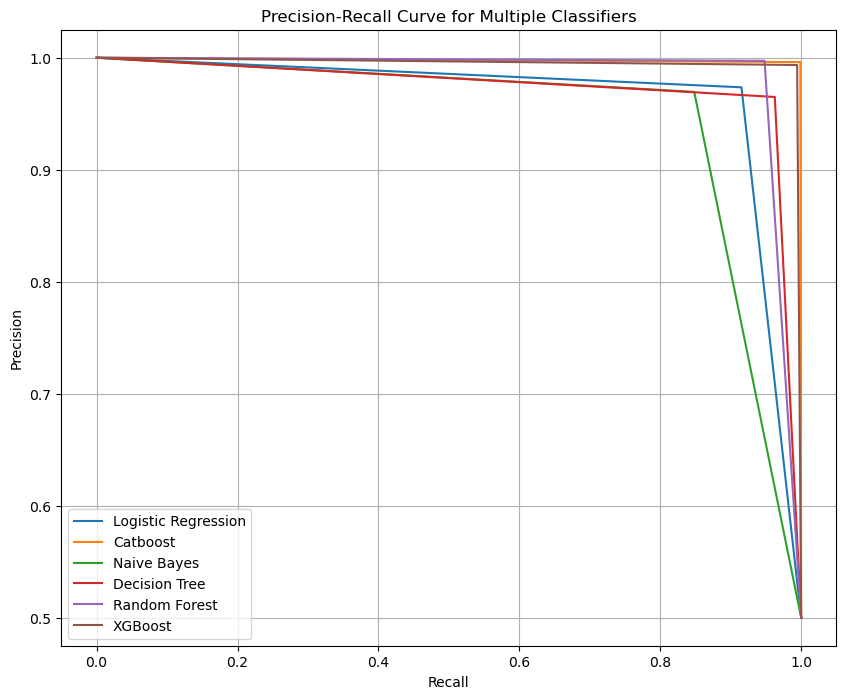

In [96]:
plt.figure(figsize=(10, 8))

for classifier, classifier_name, y_pred in zip(classifiers, classifier_names, y_preds):
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, label=classifier_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiple Classifiers')
plt.legend()
plt.grid(True)
plt.show()

## Feature Importance

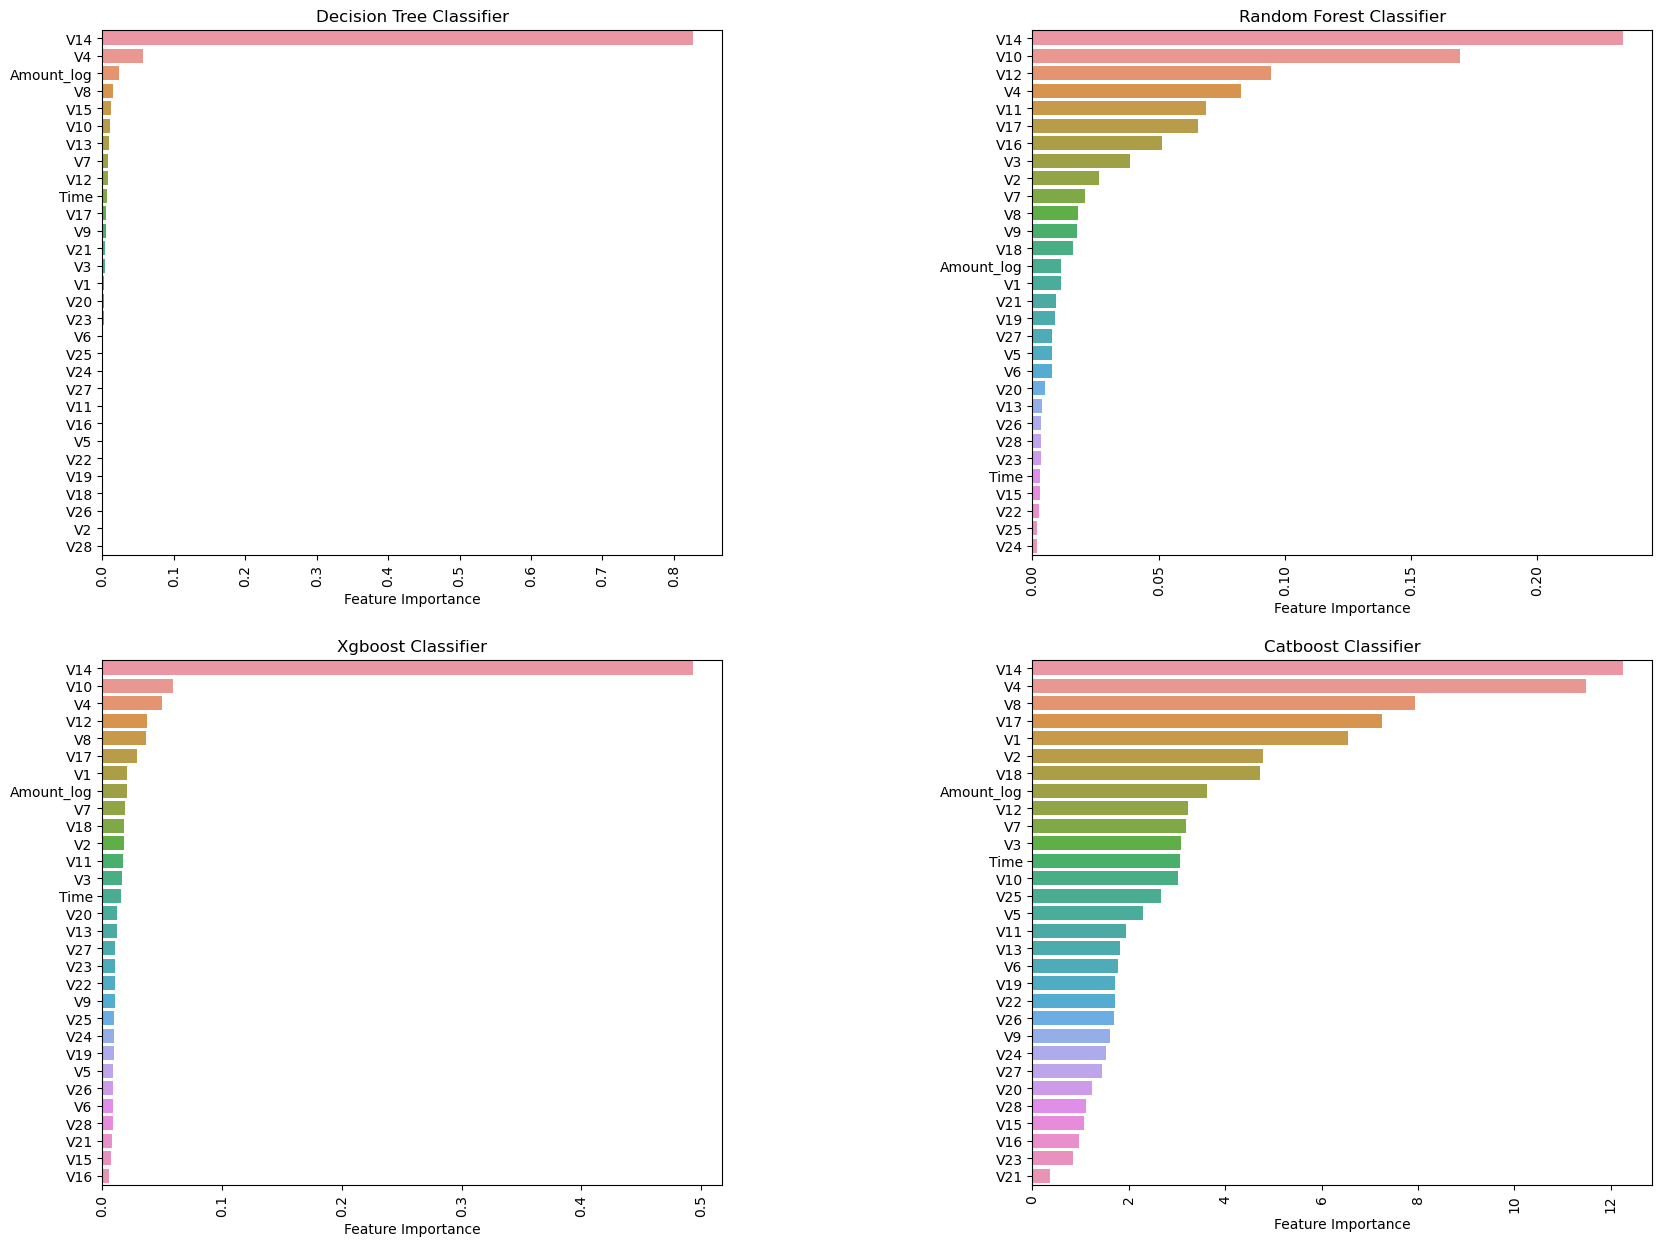

In [97]:
#feature importance for Decision Tree Classifier
feature_importance_dtree = pd.DataFrame(dtree.feature_importances_, index=X_train.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

#feature importance for Random Forest Classifier
feature_importance_rfc = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

#feature importance for Xgboost Classifier
feature_importance_xgb = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

#feature importance for Xgboost Classifier
feature_importance_catboost = pd.DataFrame(catboost.feature_importances_, index=X_train.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

fig, ax = plt.subplots(2,2,figsize=(20,15))
#space between subplots
fig.subplots_adjust(wspace=0.5)
sns.barplot(y=feature_importance_dtree.index, x=feature_importance_dtree['Feature Importance'], ax=ax[0,0]).set_title('Decision Tree Classifier')
ax[0,0].xaxis.set_tick_params(rotation=90)
sns.barplot(y=feature_importance_rfc.index, x=feature_importance_rfc['Feature Importance'], ax=ax[0,1]).set_title('Random Forest Classifier')
ax[0,1].xaxis.set_tick_params(rotation=90)
sns.barplot(y=feature_importance_xgb.index, x=feature_importance_xgb['Feature Importance'], ax=ax[1,0]).set_title('Xgboost Classifier')
ax[1,0].xaxis.set_tick_params(rotation=90)
sns.barplot(y=feature_importance_catboost.index, x=feature_importance_catboost['Feature Importance'], ax=ax[1,1]).set_title('Catboost Classifier')
ax[1,1].xaxis.set_tick_params(rotation=90)

## Observations:

1. Interestingly, for all model, they took V14 as the most important features.
2. However, for Catboost model seems to consider most of the features as important compare to others model.

# Conclusion

### A. OBSERVATIONS
* General: 
- Handling with imbalance dataset usecase. Count of fraud = 473 (0.17%) and not_fraud = 283k+ (99.83%).
- Since majority of the features already clean and produced from PCA, nothing much of cleaning can be done.

Time:
 - Majority customers are from france.
 - Majority customers are male.
 - However customer churn rate are higher for females (25.07%) compare to males (16.46%)
 - Gender might be one of the factor for customer churn

Amount:
- The majority of the customers are from age group 30-45 years old. 
- However the customer churn count is highest for the customers of age 35 to 55.
- Average customers age is 39 years old.
- Average mean age for customer who churn is 45 years old.
- The lowest churn count are from age group 20-25 years and 70+ years old.
- Age plays a significant role in customer churn, where late adults (35 to 55) are more likely to churn as compared to young adults with minimal churn count.

### B. THE METHOD & TECHNIQUES

##### HANDLING IMBALANCE DATASET
* I used Synthetic Minority Oversampling Technique (SMOTE) to balance the dataset. However, it might not be logical to syntetise data of 473 to become 280K+ data. For the purpose of experimentation, I use this approach.

#### NORMALIZATION
* "Time" features has been normalized

#### HANDLING OUTLIERS
* "Amount" features contain high numbers of outliers. I try a different approach in handling the outliers:
    - applying log transformation first
    - remove outliers using IQR method

#### MODEL SELECTION
* For the model training, I want to experiment of the model performance for between imbalance dataset vs SMOTE dataset (balance dataset)
* Since the problem is a descrete classification case, I try to train with the following model architecture:
    1. Logistic Regression
    2. Naive Bayes
    3. Decision Tree Classifier
    4. Random Forest Classifier
    5. XGBoost
    6. Catboost

#### EVALUATION
* Since this project handling imbalance data set, the most important evaluation metrix are recall, precision and f1-score, specificity, precision-recall curves.
* For fraud cases, since the original dataset is bias towards not fraud (0), I want to make sure that the model is not predicting high False Positive (Predicted = not fraud, Actual = fraud). 
* False Positive will have higher cost than False Negative in this case.
* I also want to look into evaluation metrix specificity (how well the model to predict no real event) = TN/(TN+FP)
* Based on the precision-recall curves, we can see that model using XGBoost, Random Forest Classifier & CatBoost gives the best plot.
* Highest Accuracy: Catboost
* Highest Precision: XGBoost
* Highest F1-Score: Catboost
* Highest Specificity: Catboost
* Highest Precision-Recall Curves: Catboost

### C. MODEL SELECTION
Based on the evaluation metrix and the consideration of the imbalance dataset cases, I conclude that the best model for deployement is CatBoost, due to high metrix in precision, f1-score, specificity and precision-recall curves.


### D. FUTURE ACTIONS
- Use undersampling method to compare the model performance vs upsampling using SMOTE. Maybe I can try remove the non_fraud dataset to be 10k only. But the reduction of data from 283k to 10k is too much. However, using SMOTE from 473 to be 10K might be better.